In [49]:
import matplotlib.pyplot as plt
import re
import os

In [50]:
##FOLDER_PATH = "C:\\Users\\kevin\\OneDrive\\Desktop\\Kevin12345Mc"

In [51]:
FOLDER_PATH = "C:\\Users\\km154756\\TournamentTracker\\data\\Kevin12345Mc"

In [52]:
tournament_data = {}

In [53]:
hand_pattern = re.compile(
    r"PokerStars Hand #(\d+): Tournament #(\d+), (\$\d+\.\d+\+\$\d+\.\d+) USD .*? - (\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2} \w+)"
)

chip_pattern = re.compile(
    r"Kevin12345Mc \((\d+) in chips\)"
)

In [54]:
existing_tournaments = set(tournament_data.keys())

In [55]:
for file_name in os.listdir(FOLDER_PATH):
    if file_name.endswith(".txt"):
        file_path = os.path.join(FOLDER_PATH, file_name)
        
        with open(file_path, "r", encoding="utf-8") as file:
            current_hand = None
            current_tournament = None
            current_chips = None

            for line in file:
                match_hand = hand_pattern.search(line)
                match_chips = chip_pattern.search(line)

                if match_hand:
                    ##tournament_number = match_hand.group(2)

                    
                    ##if tournament_number in existing_tournaments:
                    ##    break

                    current_hand = match_hand.group(1)
                    current_tournament = match_hand.group(2)
                    current_tournament_cost = match_hand.group(3)
                    current_hand_time = match_hand.group(4)
                    current_chips = None

                elif match_chips:
                    current_chips = match_chips.group(1)

                
                if current_hand and current_chips:
                    if current_tournament not in tournament_data:
                        tournament_data[current_tournament] = {"hand_number": [], "start_chips": []}

                    tournament_data[current_tournament]["hand_number"].append(int(current_hand))
                    tournament_data[current_tournament]["start_chips"].append(int(current_chips))
                    
                    current_hand = None
                    current_chips = None

                    existing_tournaments.add(current_tournament)

                    print(f"New Tournament {current_tournament} Found and Processed")

print("All new tournaments have been read!")


New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found and Processed
New Tournament 3850298150 Found an

In [56]:
print(tournament_data)

{'3850298150': {'hand_number': [254564103475, 254564130340, 254564161455, 254564183553, 254564191488, 254564211900, 254564217070, 254564225552, 254564248665, 254564279071, 254564286044, 254564309604, 254564318588, 254564342360, 254564365209, 254564376620, 254564390473, 254564423357, 254564435931, 254564446670, 254564454741, 254564472139, 254564494547, 254564505006, 254564514876, 254564537968, 254564557860, 254564565052, 254564577392, 254564584914, 254564607400, 254564623546, 254564639559, 254564651359, 254564668130, 254564693370, 254564701791, 254564710947, 254564733947, 254564749265, 254564760633, 254564772174, 254564783968, 254564792935, 254564807799, 254564820910, 254564830547, 254564921840, 254564944616, 254564963015, 254564982319, 254564991396, 254565006414, 254565040702, 254565056925, 254565076878, 254565104846, 254565123788, 254565139796, 254565157622, 254565177218, 254565197283, 254565220452, 254565238170, 254565271979, 254565283514, 254565291068, 254565310219, 254565345013, 25

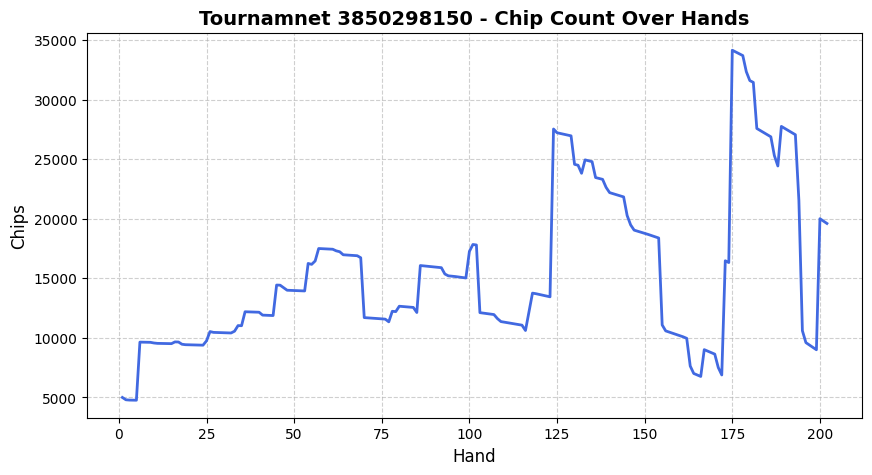

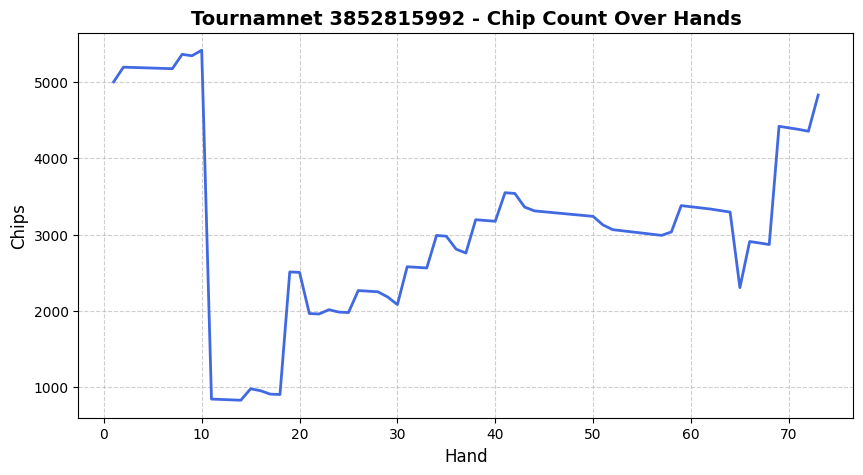

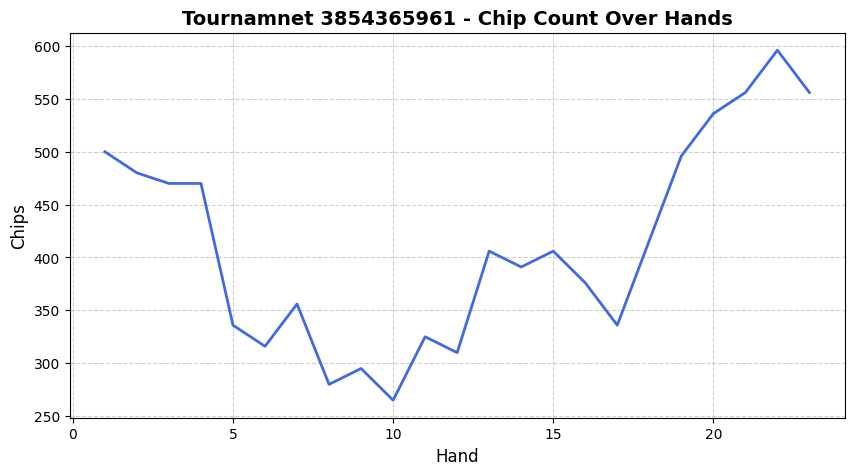

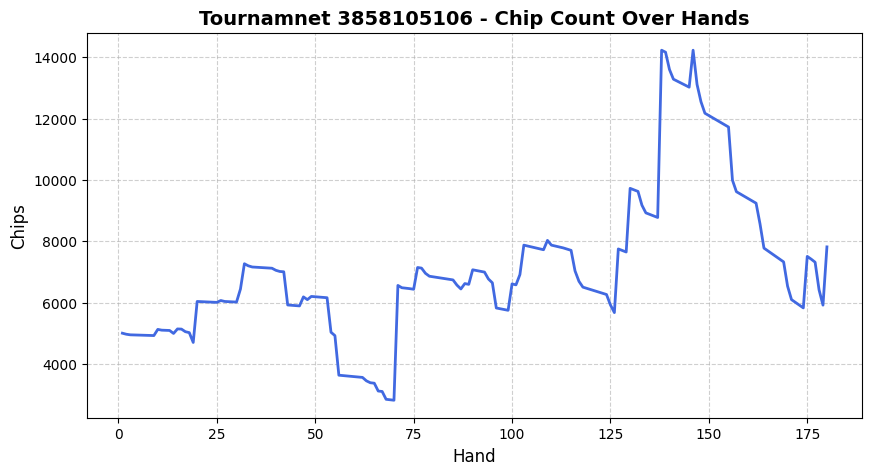

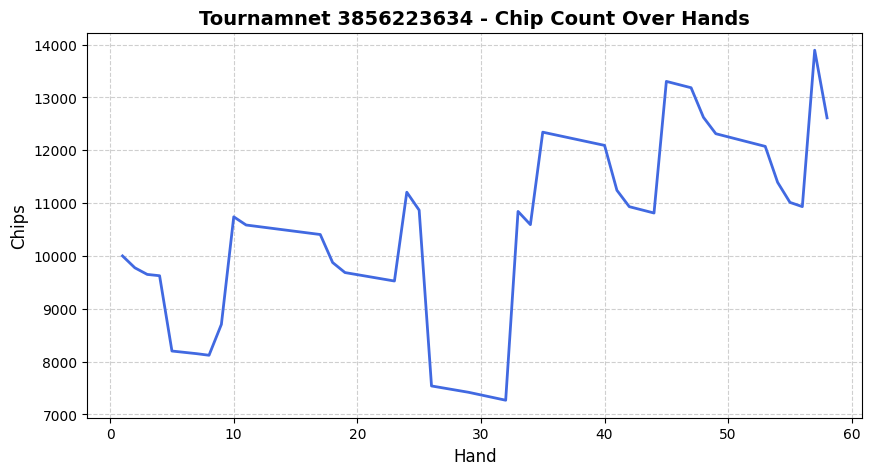

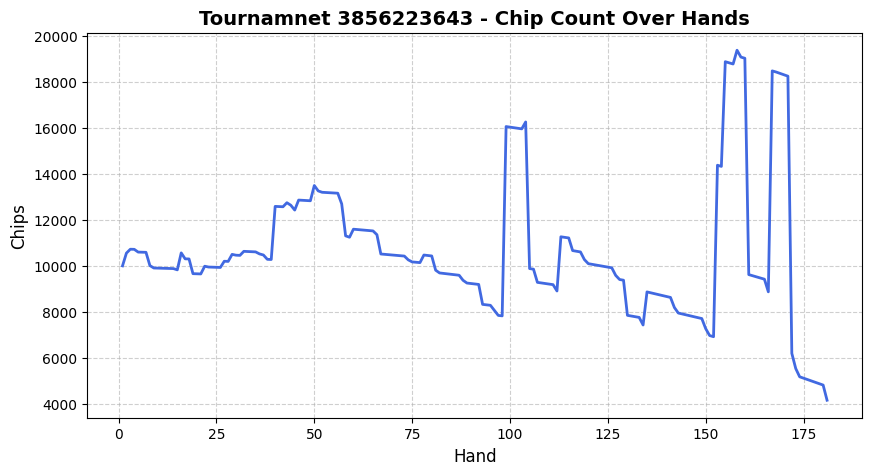

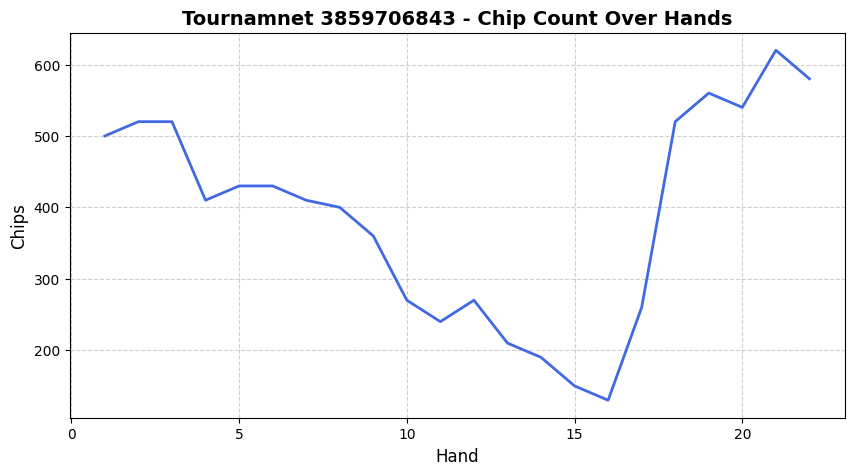

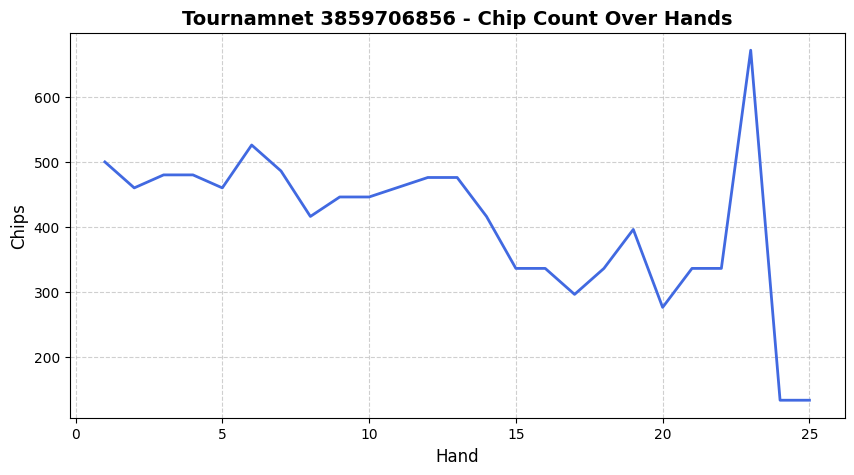

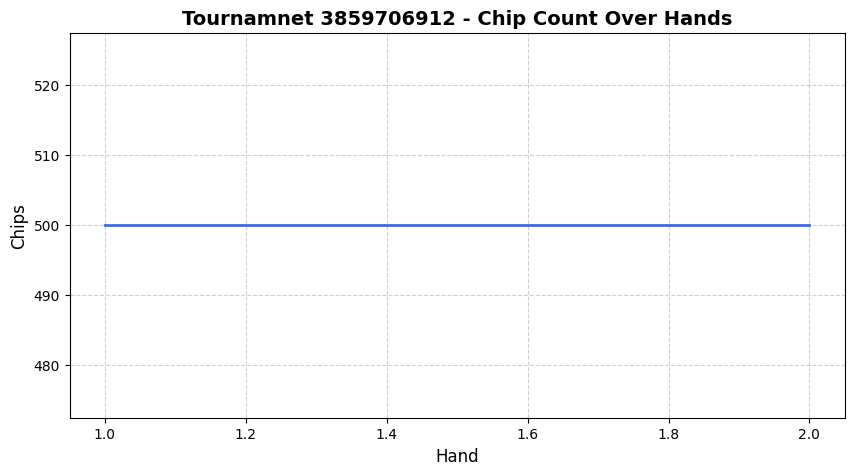

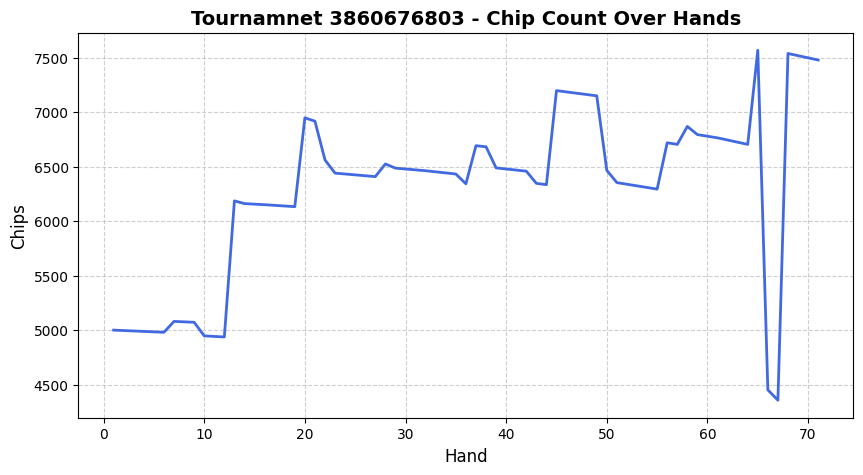

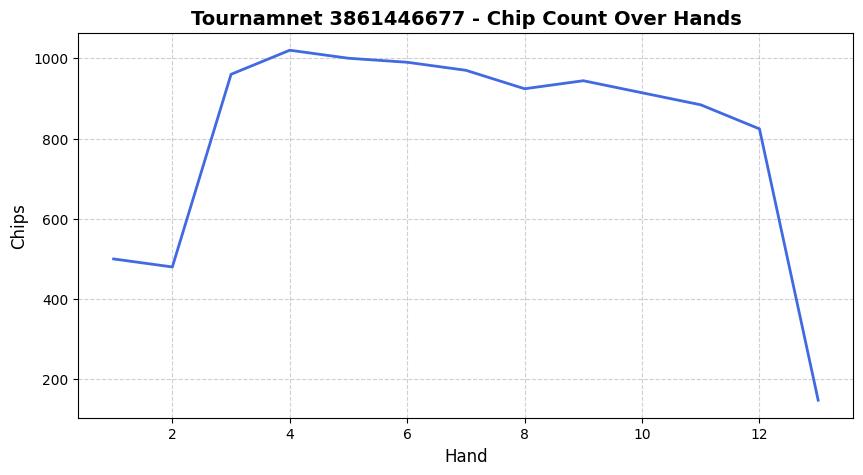

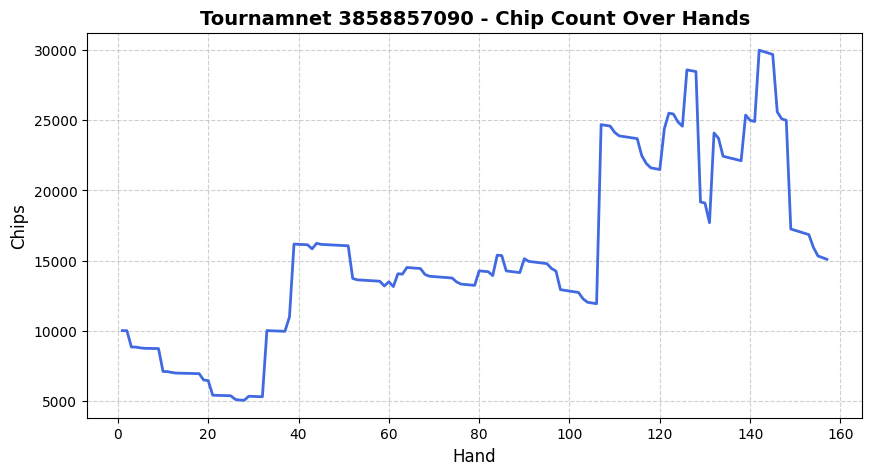

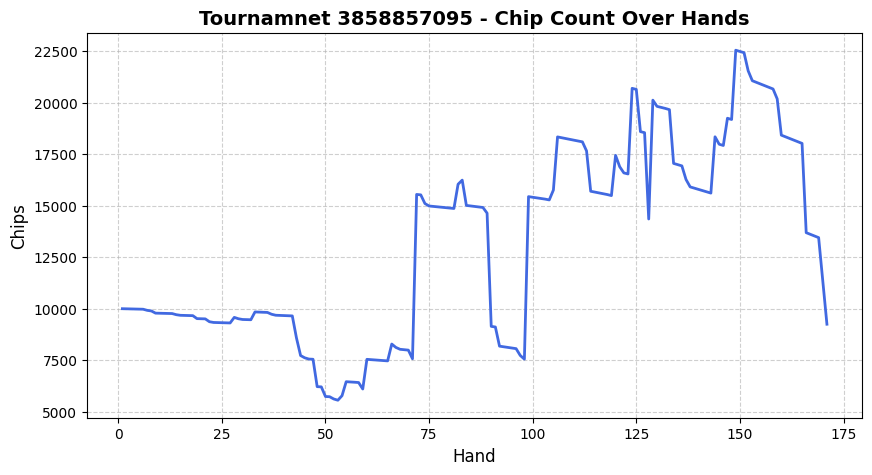

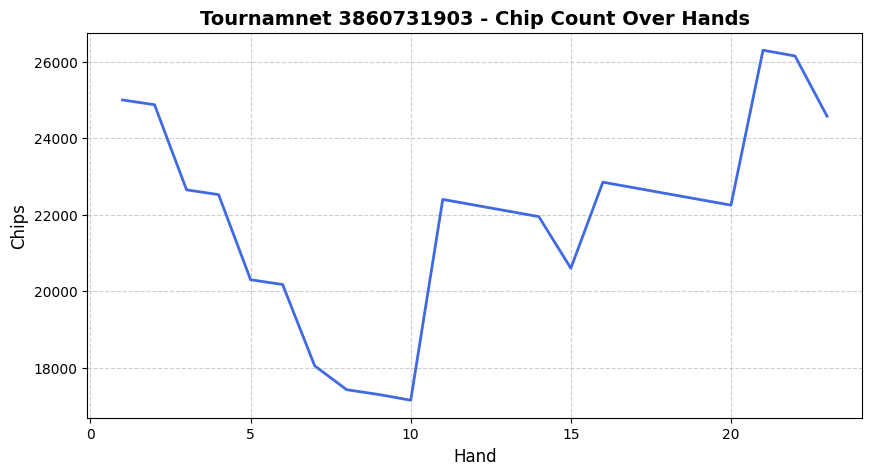

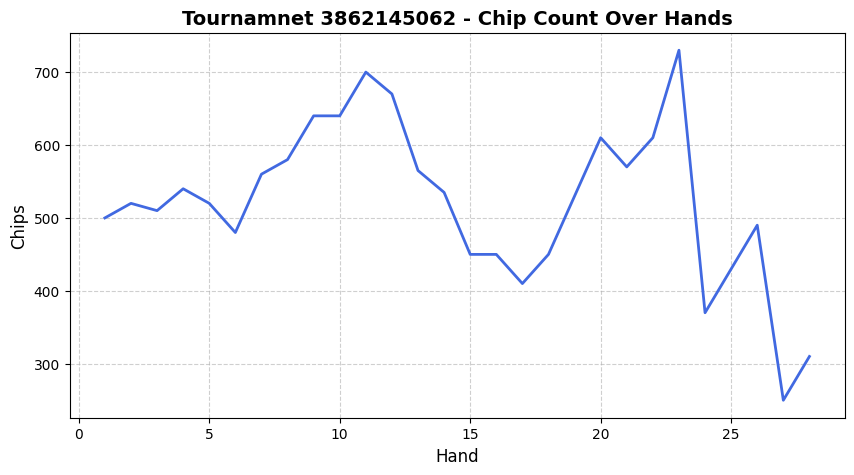

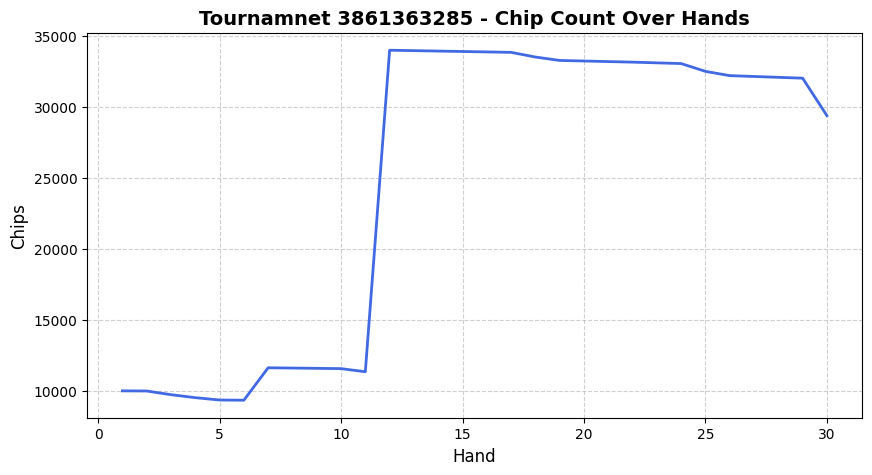

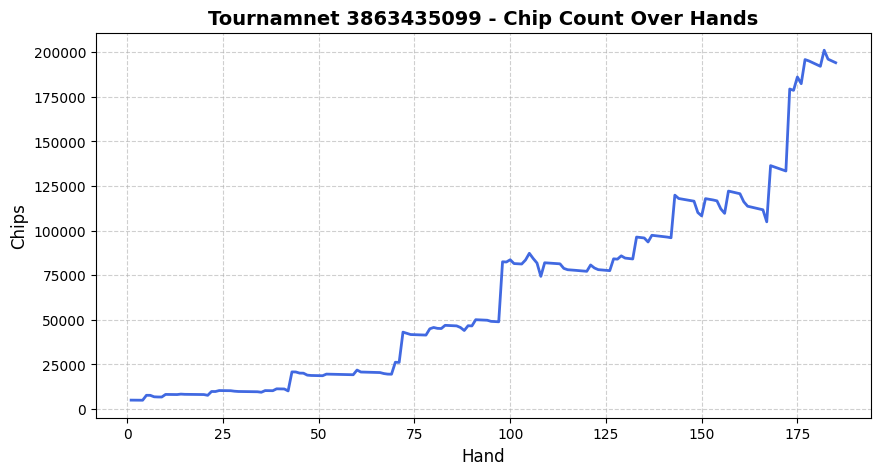

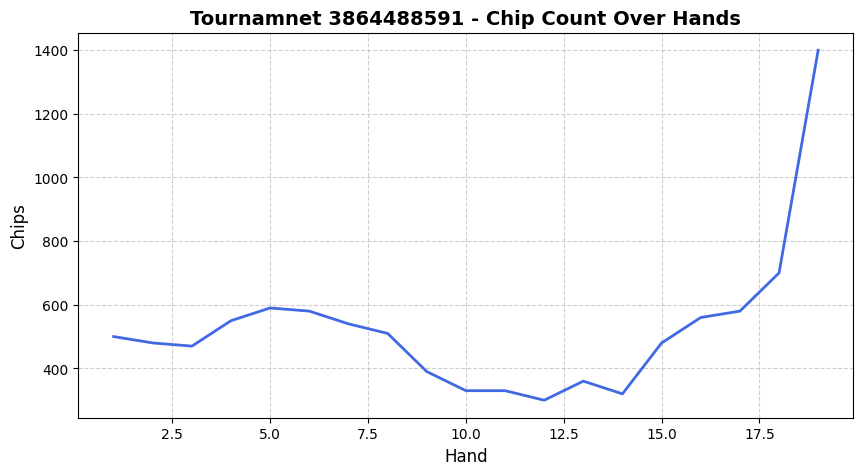

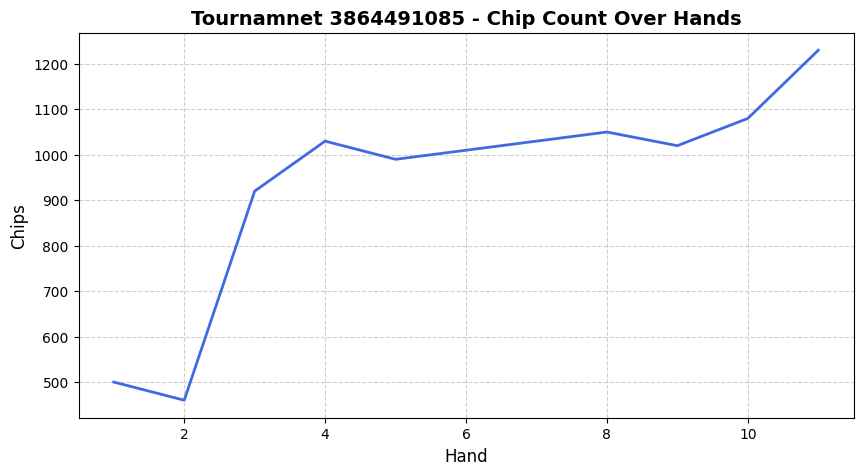

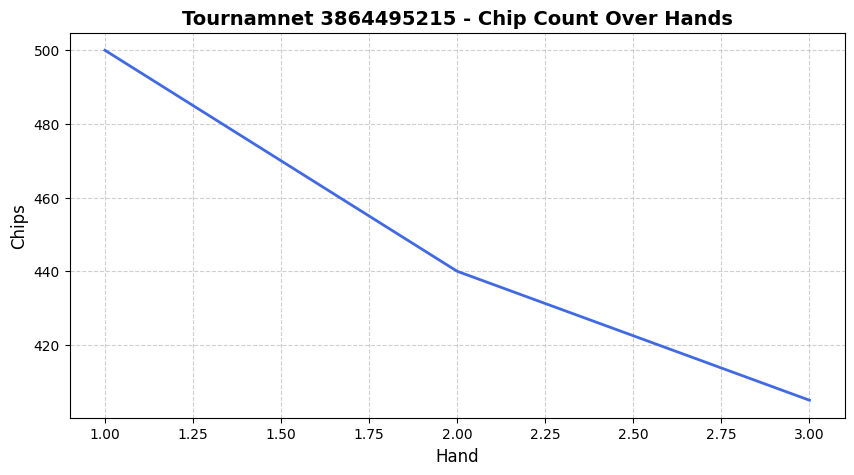

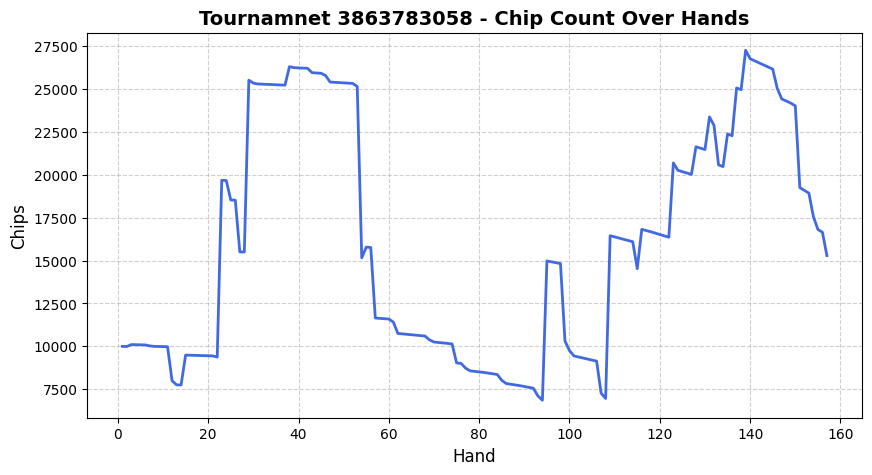

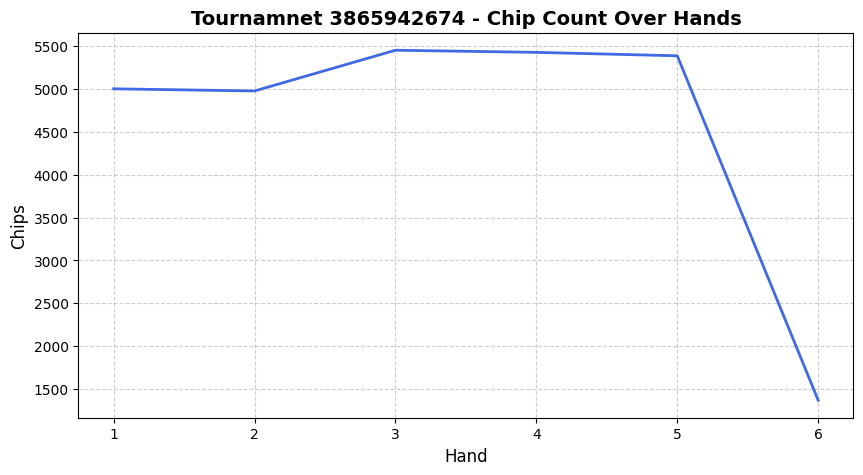

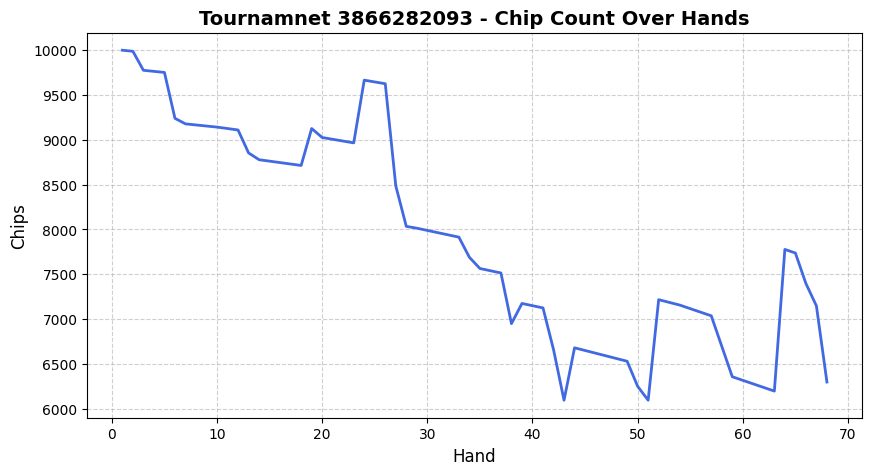

In [57]:
for tournament, data in tournament_data.items():
    raw_x = data["hand_number"]
    y = data["start_chips"]

    x = list(range(1, len(raw_x) + 1))
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, linestyle="-", color="royalblue", linewidth=2, markersize=6, label="Chips Over Hands")

    plt.grid(True, linestyle="--", alpha=0.6)

    plt.title(f"Tournamnet {tournament} - Chip Count Over Hands", fontsize=14, fontweight="bold")
    plt.xlabel("Hand", fontsize=12)
    plt.ylabel("Chips", fontsize=12)
    
    plt.show()